In [2]:
import numpy as np
import skimage.io as io
import skimage
from skimage import io, color, img_as_float

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import json





In [3]:
def load_signal_model(filename):
    with open(filename) as json_file:
        return json.load(json_file)

signals = {}
signals["kshauptsignal"] = load_signal_model('../models/signals/kshauptsignal.json')
signals["kshauptsignal2"] = load_signal_model('../models/signals/kshauptsignal2.json')
signals["kshauptsignal3"] = load_signal_model('../models/signals/kshauptsignal3.json')
signals["h_v_hauptsignal"] = load_signal_model('../models/signals/h_v_hauptsignal.json')
signals["ampel"] = load_signal_model('../models/signals/ampel.json')

colors = {
    "red" : (255, 0, 0, 255),
    "green" : (0, 255, 0, 255),
    "yellow" : (255, 255, 0, 255),
    "white" : ( 255 , 255 , 255 , 255),
    "grey" : (50, 50, 50, 255)
}

def draw_signal_aspect(image,start_point, size ,signal_type,signal_aspect):
    
    x1,y1 = start_point
    signal = signals[signal_type]
    construct = signal['construct']
    
    #background
    for background in construct['background']:
        p = [] 
        for x,y in background:
            p.append([round(x1 + x * size),round(y1 + y * size)])
            
        bg_color = (0,0,0,255)
        pts = np.array(p , np.int32)
        cv2.fillPoly(image,[pts],bg_color)
    
    
    #lights
    aspect = signal['aspects'][signal_aspect]
    for id, geo in construct['lights'].items():
        #position
        xoff = round(size * geo['x'])
        yoff = round(size * geo['y'])
        center_coordinates = (x1 + xoff, y1 + yoff)
        radius = round(size * geo['radius'])
        signal_color = colors['grey']
        if id in aspect and aspect[id] == "on":
            signal_color = colors[geo['color']]

        cv2.circle(image, center_coordinates, radius, signal_color, -1)


kshauptsignal Hp 0


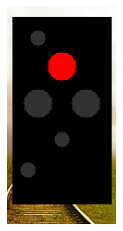

kshauptsignal Hp 0+Sh 1


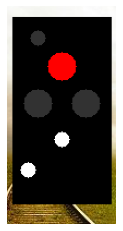

kshauptsignal Ks 2


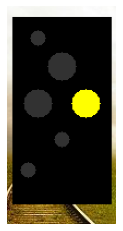

kshauptsignal Ks 2+Vwh


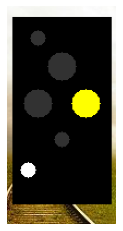

kshauptsignal Ks 2+vBw


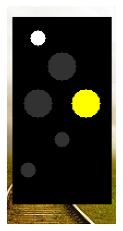

kshauptsignal Ks 1


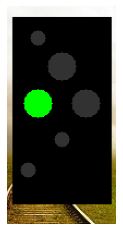

kshauptsignal Aus


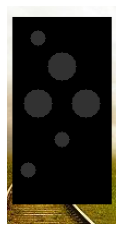

kshauptsignal Kennlicht


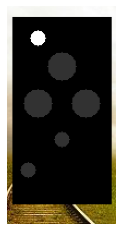

kshauptsignal2 Hp 0


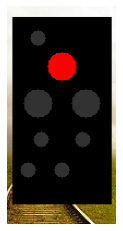

kshauptsignal2 Hp 0+Zs 1


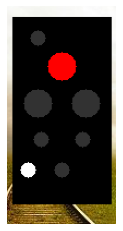

kshauptsignal2 Hp 0+Zs 7


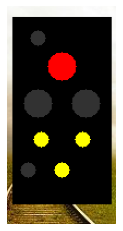

kshauptsignal2 Ks 2


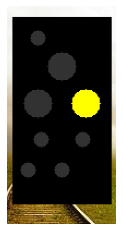

kshauptsignal2 Ks 2+Vwh


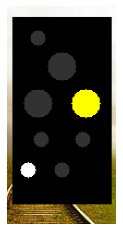

kshauptsignal2 Ks 2+vBw


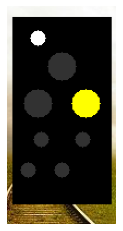

kshauptsignal2 Ks 1


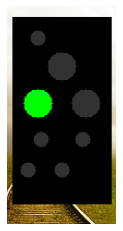

kshauptsignal2 Aus


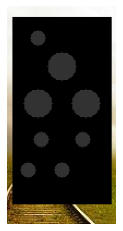

kshauptsignal2 Kennlicht


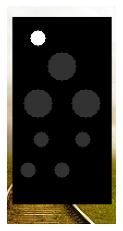

kshauptsignal2 Zusatzlicht


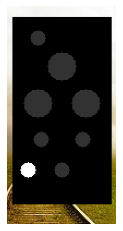

kshauptsignal3 Hp 0


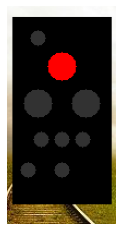

kshauptsignal3 Hp 0+Zs 1


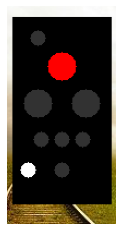

kshauptsignal3 Hp 0+Zs 7


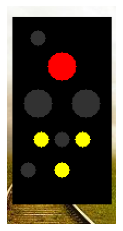

kshauptsignal3 Hp 0+Sh 1


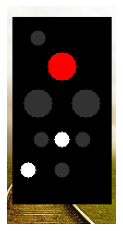

kshauptsignal3 Ks 2


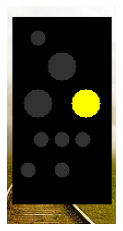

kshauptsignal3 Ks 2+Vwh


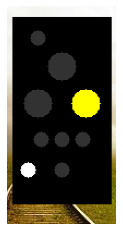

kshauptsignal3 Ks 2+vBw


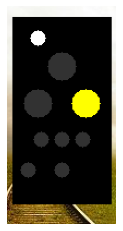

kshauptsignal3 Ks 1


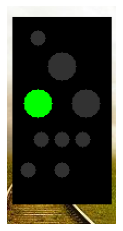

kshauptsignal3 Aus


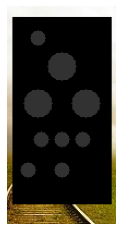

kshauptsignal3 Kennlicht


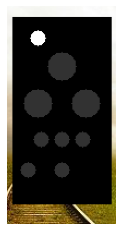

kshauptsignal3 Zusatzlicht


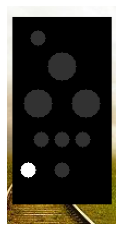

h_v_hauptsignal Hp 0


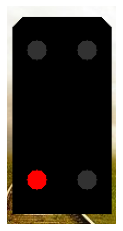

h_v_hauptsignal Hp 1


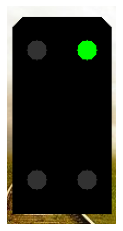

h_v_hauptsignal Hp 2


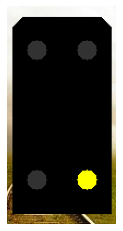

ampel green


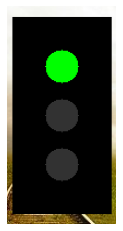

ampel yellow


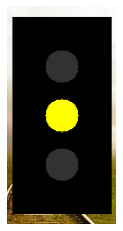

ampel red


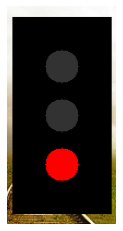

ampel yellow + red


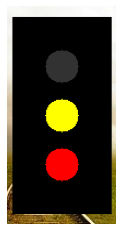

In [4]:


I = io.imread("../data/railroad-163518_640.jpg")
if I.shape[2] == 3:
    I =  cv2.cvtColor(I, cv2.COLOR_RGB2RGBA);
    
background = I[100:300,250:350]


for t in signals:
    for a in signals[t]['aspects']:
        print(t,a)
        i = np.copy(background)
        draw_signal_aspect(i,(5,10), 90 ,t,a)

        plt.axis('off')
        plt.imshow(i)
        plt.show()
        
        path = "../data/gen-signals/{}_{}.png".format(t,a.replace(" ", "_").replace("+","_"))
        io.imsave(path,i)

